# ML Exercise 1 - Taiwanese Bankrupcy

### Experiment design

1. Exploration:
    - Target Distribution
    - Missing Values distribution
    - Outliers
2. Preprocessing:
    - Split Train/Test (70-30)
    - Clean missing values
    - Remove outliers
    - Scaling
    - Encoding
    - PCA
3. Models:
    - KNN
    - RF
    - MLP
4. Hyperparameter optimization (Randomized Search CV)
    - Performance comparison
    - Holdout
    - Cross-validation
5. Metrics:
    - Accuracy
    - Precision
    - Recall
    - F1-Score
    - Runtime comparison

In [38]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import warnings
import time
from sklearn.model_selection import StratifiedShuffleSplit

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1. Exploratory Data Analysis

In [39]:
df = pd.read_csv("data/data.csv")

In [40]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [41]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [42]:
df.shape

(6819, 96)

### 1.1. Target distribution  
In the entire data set we have a target distribution of:  
0 - 6599  
1 - 220  

Which means the data set is highly imbalanced, and we will have to evaluate model results properly with multiple metrics.

### 1.2. Missing values  
We have no missing values in this data set.

In [43]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [44]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

<AxesSubplot:>

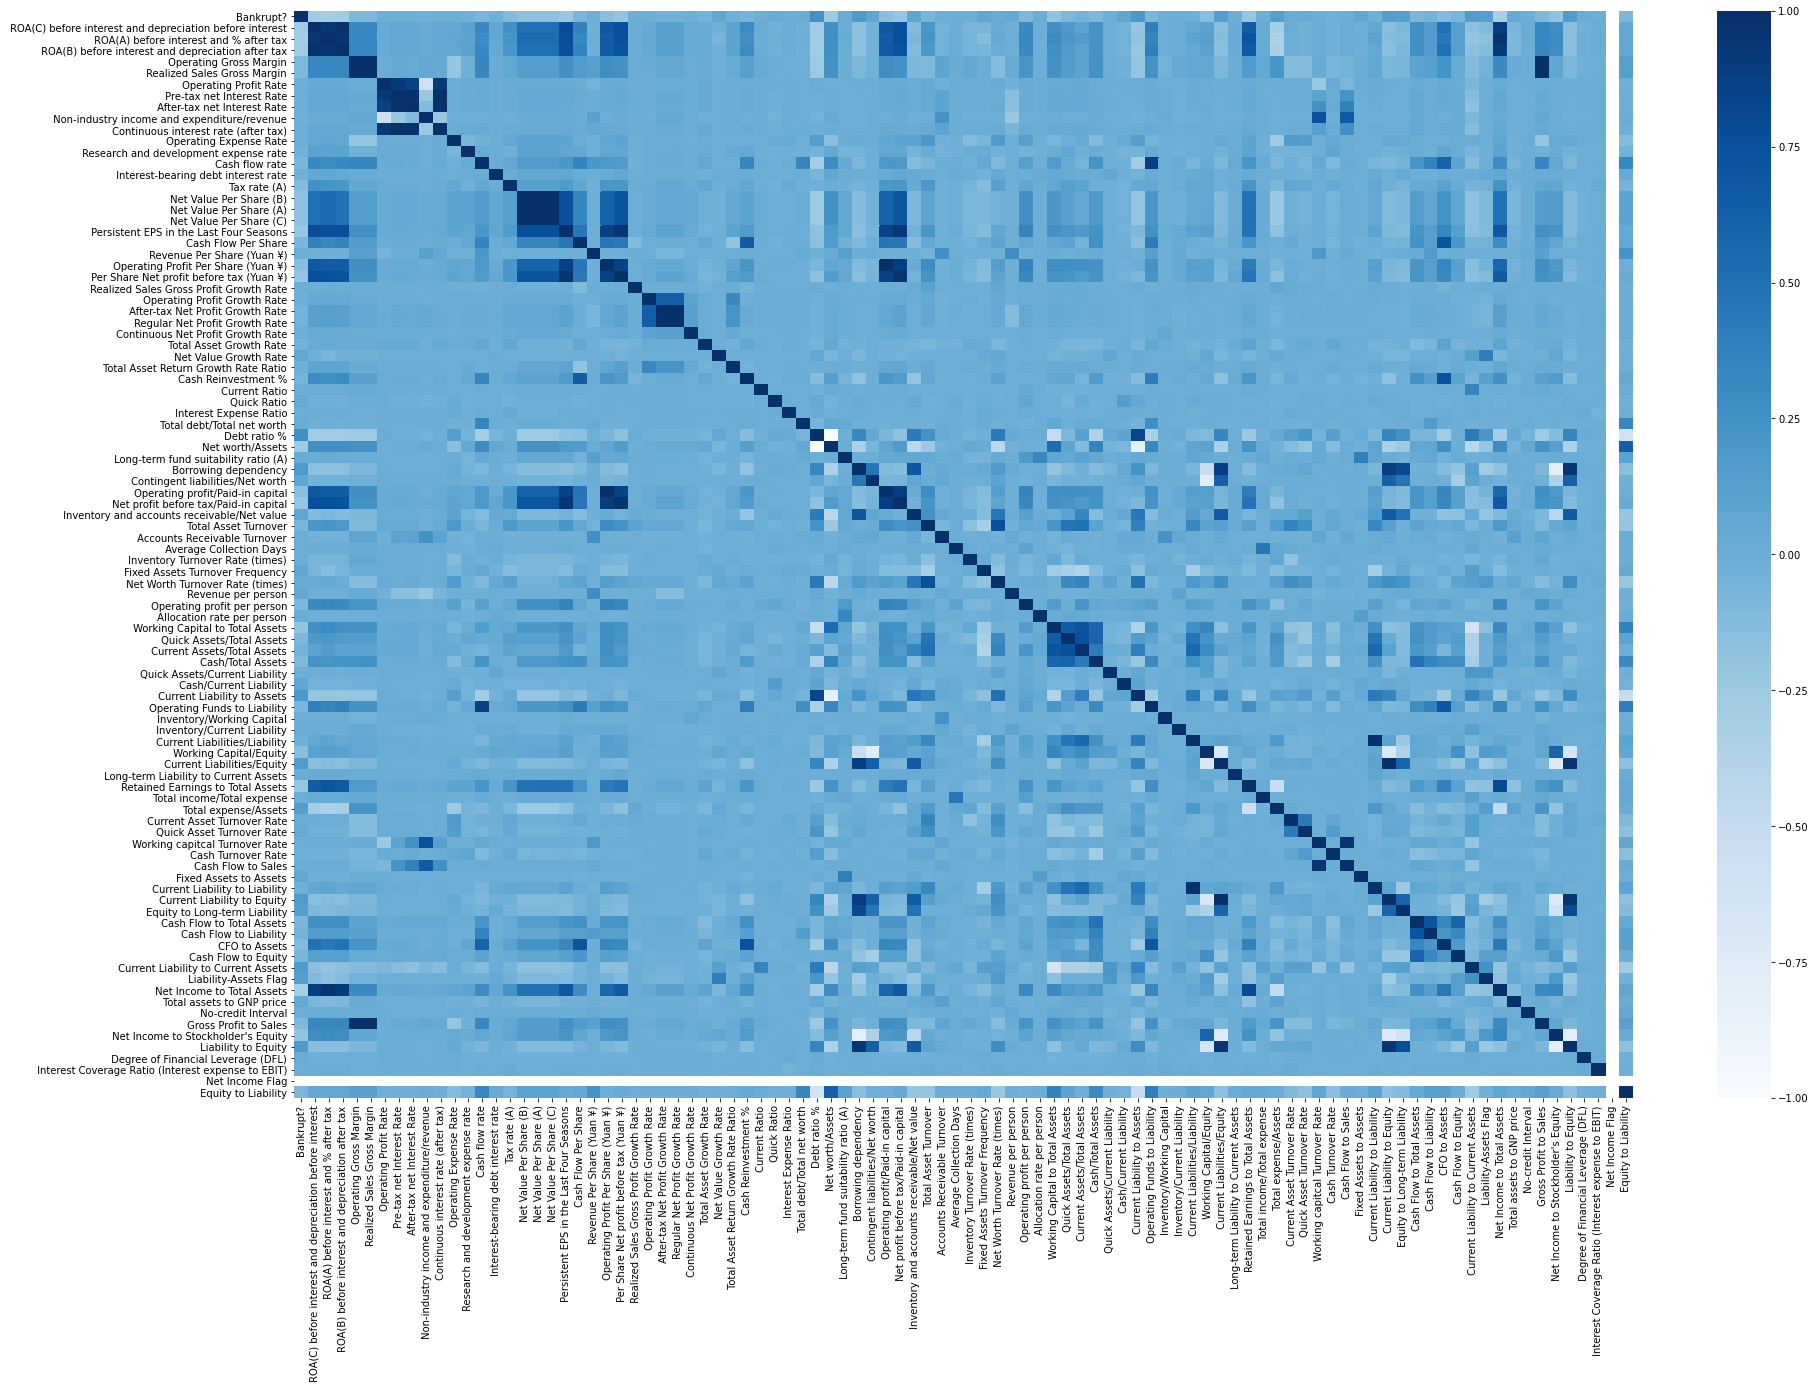

In [45]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cbar=True,annot=False,cmap='Blues')

In [46]:
# remove leading and trailing whitespace in column names
df = df.rename(columns=lambda x: x.strip())

### Distribution of independent variables

In [47]:
# boxplots of the attributes to see the distribution and outliers

# for i, col in enumerate(df.columns[1:]):
#     plt.figure(i)
#     plt.title(col+" boxplot")
#     sns.boxplot(x=df[col])

### 1.3. Outliers


From the boxplots above, we can see outliers in almost every attribute.

## 2. Preprocessing

### 2.1. Train/test split
We will do the split 70/30, but we will maintain the target variable balanced across the train and test split.

In [48]:
# split into train/test
split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df['Bankrupt?']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
X_train = strat_train_set.drop('Bankrupt?', axis=1)
y_train = strat_train_set['Bankrupt?']
X_test = strat_test_set.drop('Bankrupt?', axis=1)
y_test = strat_test_set['Bankrupt?']

### 2.2. Clean missing values
There are no missing values.

### 2.3. Remove outliers
We will try to remove the outliers with RobustScaler, and then we will also see how PCA affects  the quality of the model.

### 2.4. Scaling
We will try multiple scalers like StandardScaler, MinMaxScaler and RobustScaler.  
Standard Scaler scales the data according to the normal distribution with mean 0.  
MinMaxScaler scales the data in the range of 0,1 or -1,1 depending on the data.  
And RobustScaler removes the outliers by only choosing the data in the interquantile range.

### 2.5. Encoding
We do not have any variables that need encoding in this data set. We only have the target variable as true/false, but that is already in a binary format so we do not need to convert it to 1/0.

### 2.6. PCA

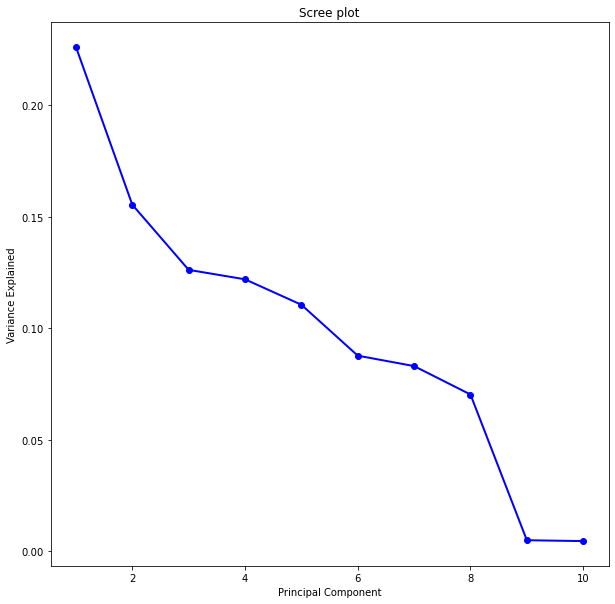

In [49]:
n_comp = 10

pca = PCA(n_components=n_comp)

pca.fit(X_train)

pc_values = np.arange(pca.n_components_) + 1

plt.figure(figsize=(10,10))
plt.plot(pc_values,pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [50]:
print( "var explained by 8 PCs" , np.cumsum(pca.explained_variance_ratio_)[7])

var explained by 8 PCs 0.9807524564085908


In [51]:
print( "var explained by 10 PCs" , np.cumsum(pca.explained_variance_ratio_)[9])

var explained by 10 PCs 0.9900057370369316


## 3. Model development

### 3.1. K-nearest neighbors

In [58]:
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

knn_search = RandomizedSearchCV(knn, knn_params, n_iter=7, scoring='accuracy', n_jobs=-1, cv=5)
knn_result = knn_search.fit(X_train, y_train)

In [59]:
print('Best Score: %s' % knn_result.best_score_)
print('Best Hyperparameters: %s' % knn_result.best_params_)

Best Score: 0.9677353002513529
Best Hyperparameters: {'n_neighbors': 13}


In [60]:
y_pred = knn_search.predict(X_test)

print("Accurracy: ", accuracy_score(y_test, y_pred))

Accurracy:  0.967741935483871


### 3.2. Random forest

In [61]:
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [100, 125, 150, 175, 200, 250, 300]
}

rf_search = RandomizedSearchCV(rf, rf_params, n_iter=7, scoring='accuracy', n_jobs=-1, cv=5)
rf_result = rf_search.fit(X_train, y_train)

In [62]:
print('Best Score: %s' % rf_result.best_score_)
print('Best Hyperparameters: %s' % rf_result.best_params_)

Best Score: 0.9706698716893323
Best Hyperparameters: {'n_estimators': 100}


In [63]:
y_pred = rf_search.predict(X_test)

print("Accurracy: ", accuracy_score(y_test, y_pred))

Accurracy:  0.969208211143695


Text(0.5, 1.0, 'Importance of attributes in RF Classifier')

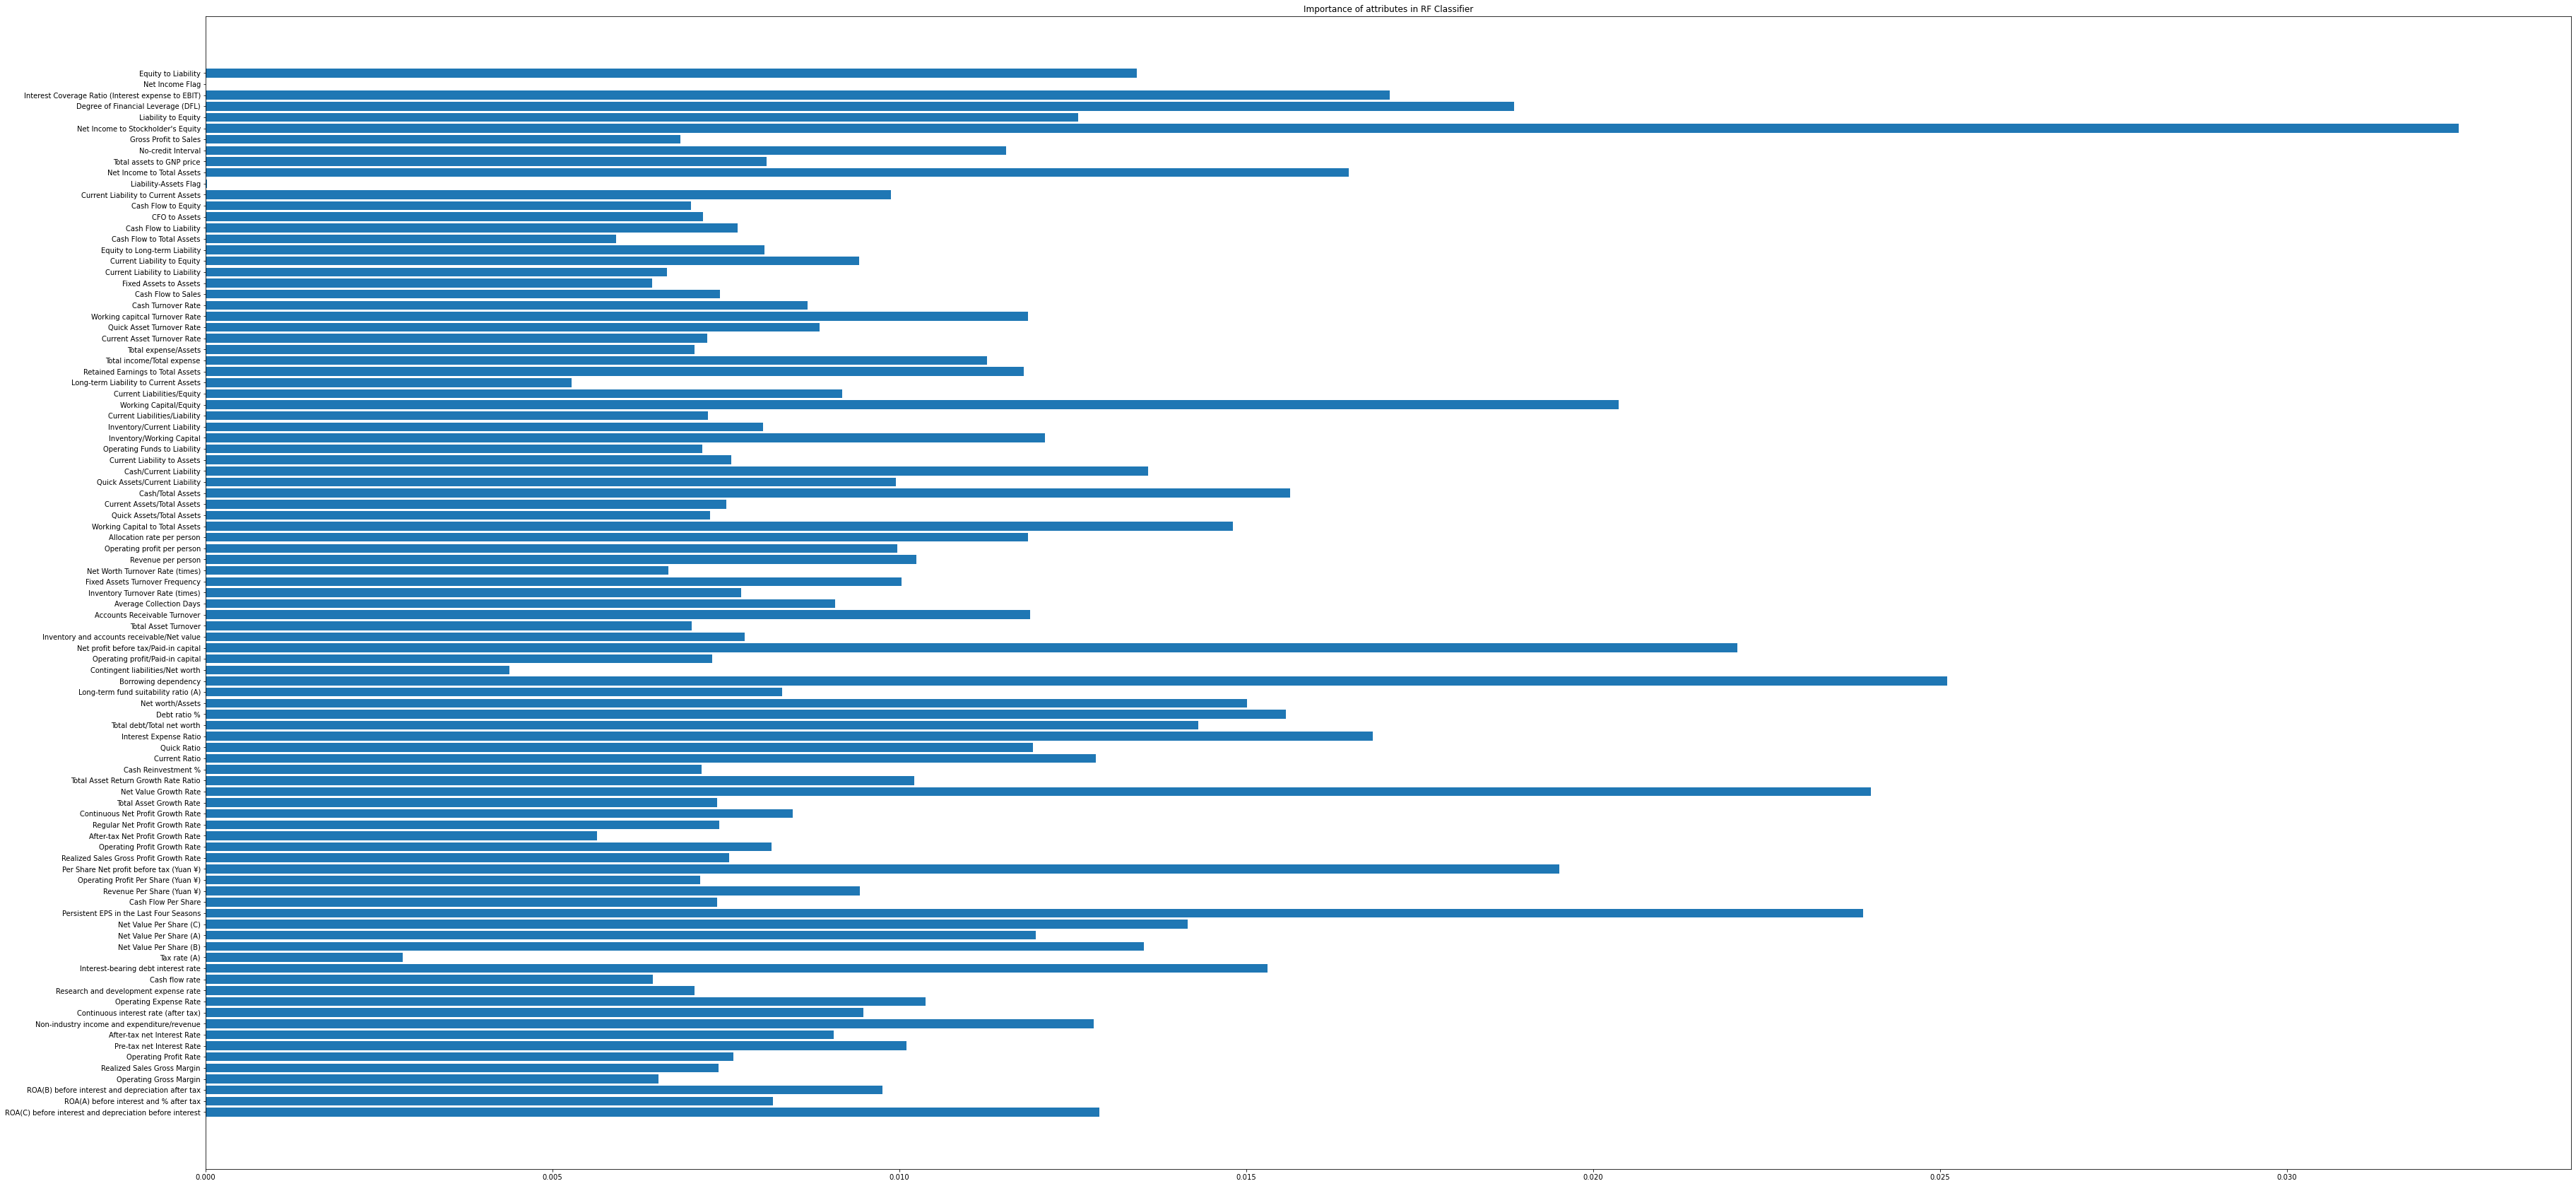

In [81]:
# creating the rf model, to plot the importance of attributes

model = RandomForestClassifier(n_estimators=200)

model.fit(X_train, y_train)

plt.barh(X_train.columns, model.feature_importances_)
plt.rcParams["figure.figsize"] = (60,30)
plt.title("Importance of attributes in RF Classifier")

In [100]:
X_train.columns[  np.argsort(-model.feature_importances_) ][:5]

Index(['Net Income to Stockholder's Equity', 'Borrowing dependency', 'Net Value Growth Rate', 'Persistent EPS in the Last Four Seasons', 'Net profit before tax/Paid-in capital'], dtype='object')

### 3.3. Multiple Layer Perceptron

In [65]:
mlp = MLPClassifier()

mlp_params = {
    'hidden_layer_sizes': [(400, 200), (300, 150), (200, 100), (400), (300), (200), (100)],
    'alpha': [0.0001, 0.0002, 0.0003],
    'learning_rate_init': [0.001, 0.002, 0.003],
    'max_iter': [500],
    'activation' : ['relu', 'tanh', 'identity', 'logistic'],
    'solver': ['adam', 'lbfgs']
}

mlp_search = RandomizedSearchCV(mlp, mlp_params, n_iter=15, scoring='accuracy', n_jobs=-1, cv=5)
mlp_result = mlp_search.fit(X_train, y_train)

In [66]:
print('Best Score: %s' % mlp_result.best_score_)
print('Best Hyperparameters: %s' % mlp_result.best_params_)

Best Score: 0.9681545874630929
Best Hyperparameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (200, 100), 'alpha': 0.0002, 'activation': 'tanh'}


In [67]:
y_pred = mlp_search.predict(X_test)

print("Accurracy: ", accuracy_score(y_test, y_pred))

Accurracy:  0.967741935483871


## Model comparison

In [50]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [68]:
cols = ["algorithm", "scaler", "val", "accuracy", "precision", "recall", "f1", "elapsed_time (sec)"]
results = pd.DataFrame(columns = cols)

classifiers = [
    KNeighborsClassifier(n_neighbors=13),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(hidden_layer_sizes=(200,100),
                  solver='adam',
                  activation='tanh',
                  alpha=0.0002,
                  max_iter=500,
                  learning_rate_init=0.001)
]

scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    PCA(n_components=10),
    None
]

validation = ['cv', 'holdout']

for classifier in classifiers:
    for scaler in scalers:
        for validation_method in validation:
            steps = [
                ('scaler', scaler),
                ('clf', classifier)
            ]
            
            pipeline = Pipeline(steps)
            algorithm = classifier
            
            if validation_method == 'holdout':
                split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
                for train_index, test_index in split.split(df, df['Bankrupt?']):
                    strat_train_set = df.loc[train_index]
                    strat_test_set = df.loc[test_index]
    
                X_train = strat_train_set.drop('Bankrupt?', axis=1)
                y_train = strat_train_set['Bankrupt?']
                X_test = strat_test_set.drop('Bankrupt?', axis=1)
                y_test = strat_test_set['Bankrupt?']
                
                # --------------------------------
                st = time.time()
                # ------------
                pipeline.fit(X_train, y_train)   
                # ------------
                et = time.time()
                # --------------------------------

                y_pred = pipeline.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
                recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
                f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
                elapsed_time = et - st

                new_row = pd.DataFrame({
                    "algorithm": str(algorithm),
                    "scaler": str(scaler),
                    "val": 'holdout',
                    "accuracy": accuracy,
                    "precision":precision,
                    "recall":recall,
                    "f1": f1,
                    "elapsed_time (sec)": elapsed_time}, index=[0])

                results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)
                
            elif validation_method == 'cv':
                
                X = df.drop(columns=['Bankrupt?'])
                y = df['Bankrupt?']
                
                # --------------------------------
                st = time.time()
                # ------------
                accuracy_scores = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
                # ------------
                et = time.time()
                # --------------------------------
                
                elapsed_time = et - st
                
                precision_scores = cross_val_score(pipeline, X, y, cv=5, scoring="precision")
                recall_scores = cross_val_score(pipeline, X, y, cv=5, scoring="recall")
                f1_scores = cross_val_score(pipeline, X, y, cv=5, scoring="f1")
                
                new_row = pd.DataFrame({
                    "algorithm": str(algorithm),
                    "scaler": str(scaler),
                    "val": 'cv',
                    "accuracy": accuracy_scores.mean(),
                    "precision":precision_scores.mean(),
                    "recall":recall_scores.mean(),
                    "f1": f1_scores.mean(),
                    "elapsed_time (sec)": elapsed_time}, index=[0])
                
                results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

In [76]:
results.iloc[:, 3:]= results.iloc[:, 3:].round(3)

In [80]:
results.sort_values(by="recall", ascending=False)

,algorithm,scaler,val,accuracy,precision,recall,f1,elapsed_time (sec)
8,"MLPClassifier(activation='tanh', alpha=0.0002,...",StandardScaler(),holdout,0.957,0.653,0.655,0.654,18.264
10,RandomForestClassifier(),None,holdout,0.970,0.796,0.596,0.642,1.910
18,RandomForestClassifier(),StandardScaler(),holdout,0.970,0.787,0.589,0.632,1.682
6,"MLPClassifier(activation='tanh', alpha=0.0002,...",MinMaxScaler(),holdout,0.968,0.748,0.588,0.627,9.163
14,RandomForestClassifier(),RobustScaler(),holdout,0.969,0.761,0.581,0.620,2.253
4,"MLPClassifier(activation='tanh', alpha=0.0002,...",RobustScaler(),holdout,0.962,0.642,0.570,0.592,7.787
16,RandomForestClassifier(),MinMaxScaler(),holdout,0.967,0.723,0.566,0.598,2.087
28,KNeighborsClassifier(n_neighbors=13),StandardScaler(),holdout,0.967,0.712,0.536,0.557,0.013
24,KNeighborsClassifier(n_neighbors=13),RobustScaler(),holdout,0.968,0.818,0.515,0.521,0.031
26,KNeighborsClassifier(n_neighbors=13),MinMaxScaler(),holdout,0.967,0.484,0.500,0.492,0.013


## 4. Results discussion

The algorithm that performed the best on this data set was the Random Forest Classifier with an accuracy of 97%. The other algorithms came in close second, but it didn't matter what kind of scaler occured before the RFClassifier, it still managed to provide very good results. There are no visible differences between the effectiveness of scalers in this task.